# Development of Paper Plot Library

- 論文用グラフ作成ライブラリの開発．
- 論文用にフォーマットをいろいろ調整するのが大変なので，データを用意すればそれっぽいグラフを出力できるようなライブラリを開発する
- 途中までになっていた graph_plotter を改変していく形

## 開発方針

- Growi も参照

- 設定と描画と保存を分ける．
- 何を描画しようともある程度共通する要素がある
    - まず，どういうグラフにするか設定をする
    - データを渡しグラフを描画する
    - 描画した後の処理
- 基礎はmatplotlib で将来的に seaborn にも対応する
- 設定は辞書型で, kwargs みたいな感じで渡していくように
- デフォルトの設定があって，渡された要素の追加・更新ができるようにする
- [ ] 利用可能なフォント検索機能を実装する 
- [ ] グラフの見た目調整も描画する部分を分離して柔軟に変更できるようにする．
    - [ ] set() を使ってもろもろを設定できるといい

- フォント設定：日本語と英語を大体で設定できるようにしたい
    - まぁ，イラレで修正すればいいから実際そこまで頑張らなくていいポイントかも

In [3]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import seaborn as sns

props = {
    "axes.grid": True,
    "grid.linestyle": '-',
    "xtick.direction": 'in',
    "ytick.direction": 'in',
    "xtick.top": False,
    "ytick.right": False,
    "xtick.bottom": True,
    "ytick.left": True,
    "axes.linewidth": 1.0,
    "axes.axisbelow": True
}

default_props = plt.rcParams.copy()
# mpl.RcParams(props)
plt.rcParams.update(props)

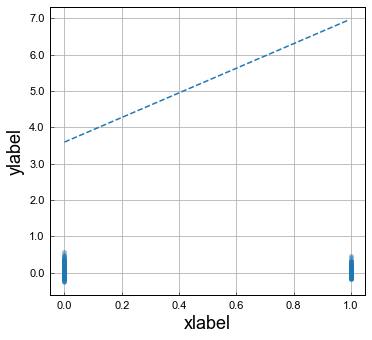

<Figure size 460.8x316.8 with 0 Axes>

In [33]:
from paper_plot import paper_plot
fmri = sns.load_dataset("fmri")

x = np.arange(0, 1, 0.01)
x = x.reshape(-1, 1)
y = x + 10*np.random.rand(100, 1)

pp = paper_plot()
ax1 = pp.create_new_axis(111)
pp.scatter(ax1, fmri.region, fmri.signal)
pp.regression(ax1, x, y)
pp.set_axes_params(ax1)
pp.display_process()

In [37]:
r, c = np.arange(0, 1, 0.01).shape

[autoreload of paper_plot failed: Traceback (most recent call last):
  File "C:\Users\keigo\anaconda3\envs\lab\lib\site-packages\IPython\extensions\autoreload.py", line 245, in check
    superreload(m, reload, self.old_objects)
  File "C:\Users\keigo\anaconda3\envs\lab\lib\site-packages\IPython\extensions\autoreload.py", line 394, in superreload
    module = reload(module)
  File "C:\Users\keigo\anaconda3\envs\lab\lib\imp.py", line 315, in reload
    return importlib.reload(module)
  File "C:\Users\keigo\anaconda3\envs\lab\lib\importlib\__init__.py", line 169, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 630, in _exec
  File "<frozen importlib._bootstrap_external>", line 724, in exec_module
  File "<frozen importlib._bootstrap_external>", line 860, in get_code
  File "<frozen importlib._bootstrap_external>", line 791, in source_to_code
  File "<frozen importlib._bootstrap>", line 219, in _call_with_frames_removed
  File "C:\Users\keigo\Dropb

ValueError: not enough values to unpack (expected 2, got 1)

In [7]:
%load_ext autoreload
%autoreload 2

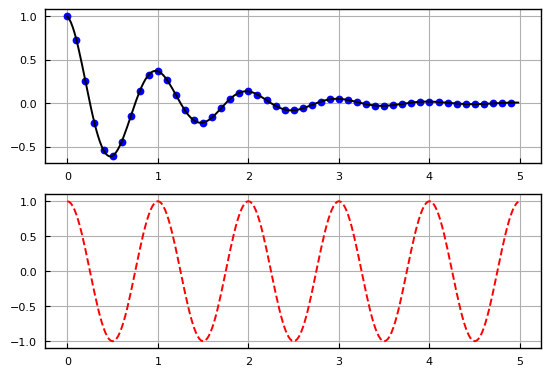

In [35]:
plt.style.use("seaborn-paper")
def f(t):
    return np.exp(-t) * np.cos(2*np.pi*t)

t1 = np.arange(0.0, 5.0, 0.1)
t2 = np.arange(0.0, 5.0, 0.02)

plt.figure(1)
plt.subplot(211)
plt.plot(t1, f(t1), 'bo', t2, f(t2), 'k')

plt.subplot(212)
plt.plot(t2, np.cos(2*np.pi*t2), 'r--')
plt.show()

In [28]:
a = dict(a=1, b=2)
b = dict(a=3, c=4)

In [32]:
def f(**kwargs) :
    c = {**a, **kwargs}
    return c

In [56]:
import matplotlib.font_manager as fm
import re
font_prop = fm.FontProperties(family="serif",
#                               style="normal",
#                               variant="normal",
#                               weight="normal",
#                               stretch="normal",
#                               size="medium",
                             )
fm.findfont(font_prop)

fl = np.array(fm.findSystemFonts())
kw = "ゴシック"
ol = [p for p in fl if re.match(".*{}.*".format(kw), p)]

In [ ]:
plt.rcParams

# 参照 

- plt.style.use
    - https://qiita.com/eriksoon/items/b93030ba4dc686ecfbba
    - https://matplotlib.org/3.1.0/gallery/style_sheets/style_sheets_reference.html
- matplotlib.font_manager
    - Font Properties
        - https://matplotlib.org/3.3.3/api/font_manager_api.html#matplotlib.font_manager.FontProperties
    
    